In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("data/processed/clean_reddit_posts.csv")

# Show first few rows
df.head()


,source,date,text,label,clean_text
0,depression,2019-10-29 14:52:02,Our most-broken and least-understood rules is ...,distress,mostbroken leastunderstood rule helper may inv...
1,depression,2025-04-14 06:26:08,"Regular check-in post, with essential informat...",distress,regular checkin post essential information rul...
2,depression,2025-09-07 11:18:06,"I am so alone, so worthless and so filled with...",distress,alone worthless filled dread england living pa...
3,depression,2025-09-07 10:01:31,Life's a joke Ha im battling depression and ev...,distress,life joke ha im battling depression even reddi...
4,depression,2025-09-07 06:07:25,Three days ago I almost kms for reasons that e...,distress,three day ago almost km reason ended completel...


In [2]:
print("Rows, Columns:", df.shape)
print(df.info())
print(df.isnull().sum())


Rows, Columns: (3263, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   source      3263 non-null   object
 1   date        3263 non-null   object
 2   text        3263 non-null   object
 3   label       3263 non-null   object
 4   clean_text  3252 non-null   object
dtypes: object(5)
memory usage: 127.6+ KB
None
source         0
date           0
text           0
label          0
clean_text    11
dtype: int64


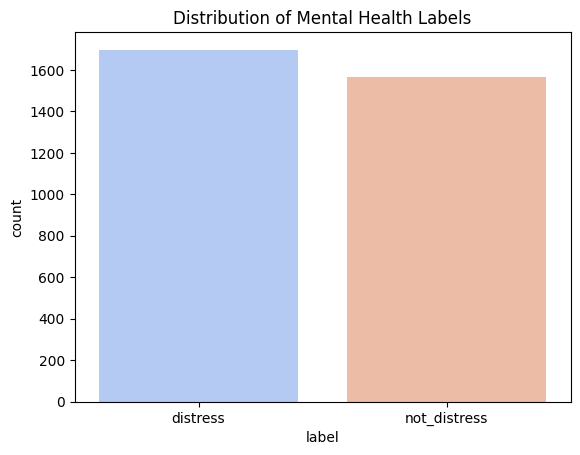

label
distress        0.520074
not_distress    0.479926
Name: proportion, dtype: float64

In [4]:
sns.countplot(data=df, x="label", hue="label", palette="coolwarm", legend=False)
plt.title("Distribution of Mental Health Labels")
plt.show()

df["label"].value_counts(normalize=True)


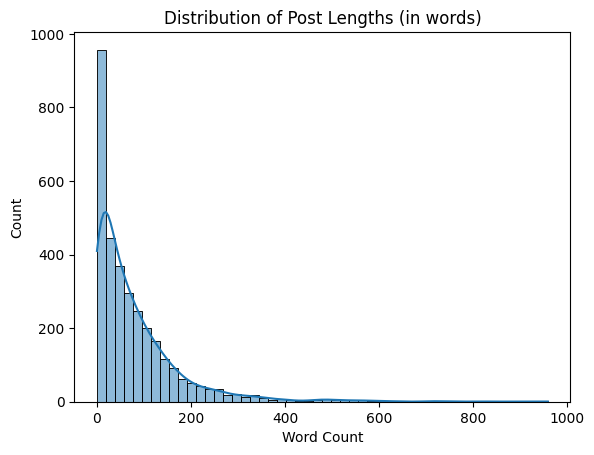

In [6]:
df["text_length"] = df["clean_text"].fillna("").apply(lambda x: len(x.split()))

sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Post Lengths (in words)")
plt.xlabel("Word Count")
plt.show()


In [9]:
from collections import Counter
import pandas as pd

# Make sure all values are strings
all_words = " ".join(df["clean_text"].fillna("").astype(str)).split()

word_freq = Counter(all_words)

# Show 20 most common words
pd.DataFrame(word_freq.most_common(20), columns=["Word", "Frequency"])


,Word,Frequency
0,im,4508
1,like,3495
2,feel,2992
3,dont,2481
4,time,2014
5,know,1907
6,get,1728
7,even,1661
8,ive,1661
9,want,1658


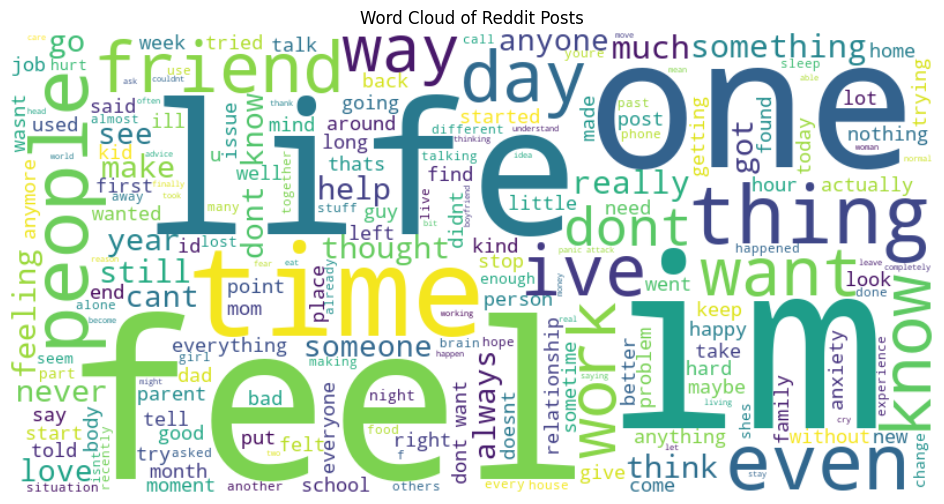

In [12]:
# Convert all to strings and fill NaN
text = " ".join(df["clean_text"].fillna("").astype(str))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reddit Posts")
plt.show()


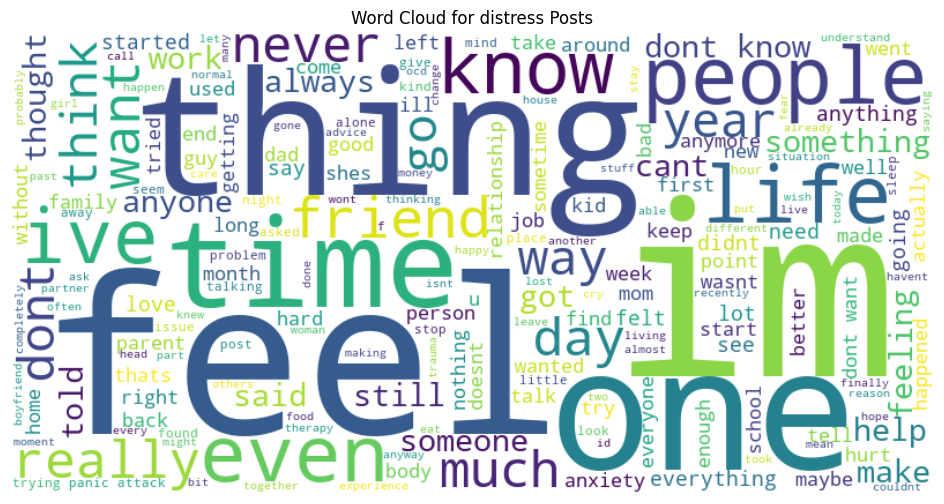

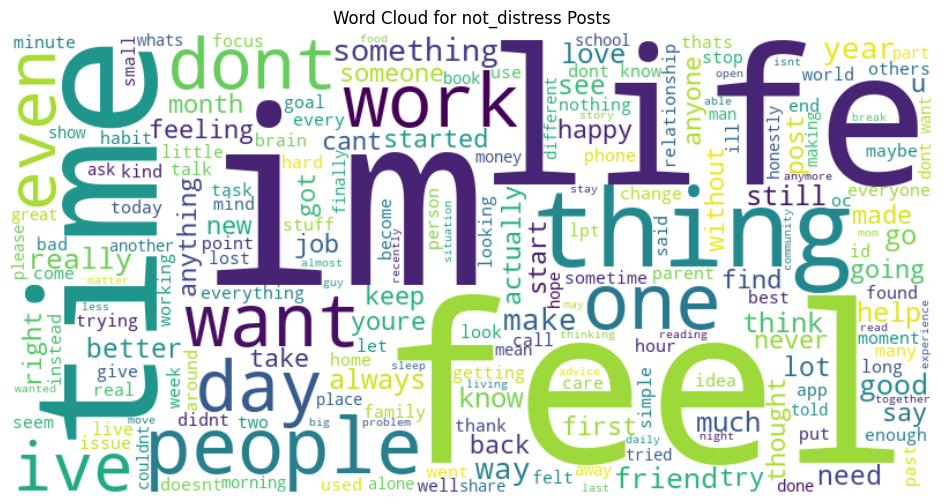

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in df["label"].unique():
    # make sure text is cleaned properly
    text = " ".join(df[df["label"] == label]["clean_text"].fillna("").astype(str))

    if text.strip():  # only generate if there's text
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

        plt.figure(figsize=(12,6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {label} Posts")
        plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20668\96651042.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x="score", y="word", palette="viridis")


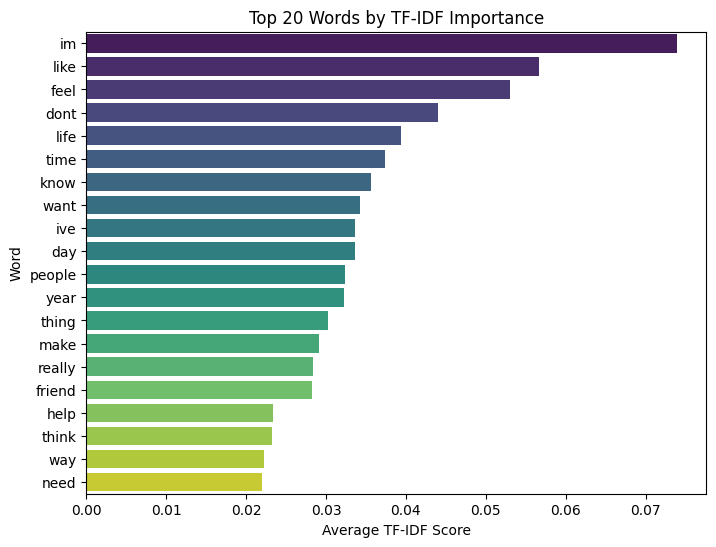

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure column is clean
texts = df["clean_text"].fillna("").astype(str)

# Convert text into TF-IDF features
tfidf = TfidfVectorizer(max_features=500, stop_words="english")
X = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()

# Average TF-IDF score per word
avg_tfidf = X.mean(axis=0).A1
tfidf_scores = pd.DataFrame({"word": feature_names, "score": avg_tfidf})
top_words = tfidf_scores.sort_values("score", ascending=False).head(20)

# Plot top words
plt.figure(figsize=(8,6))
sns.barplot(data=top_words, x="score", y="word", palette="viridis")
plt.title("Top 20 Words by TF-IDF Importance")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20668\3441527688.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="text_length", palette="coolwarm")


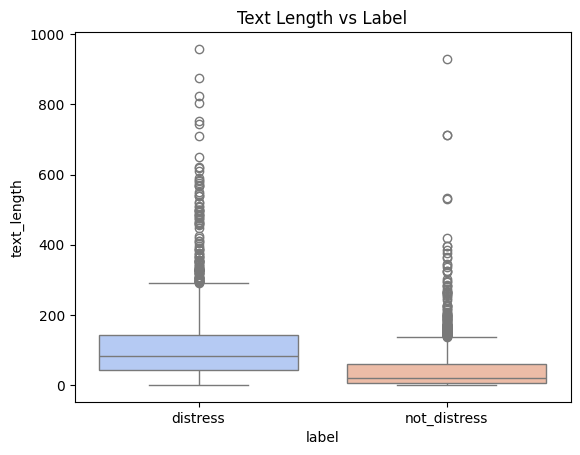

In [17]:
sns.boxplot(data=df, x="label", y="text_length", palette="coolwarm")
plt.title("Text Length vs Label")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# Features (X) and Labels (y)
X = df["clean_text"].fillna("").astype(str)
y = df["label"]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    distress       0.74      0.95      0.83       354
not_distress       0.91      0.61      0.73       299

    accuracy                           0.79       653
   macro avg       0.82      0.78      0.78       653
weighted avg       0.82      0.79      0.78       653



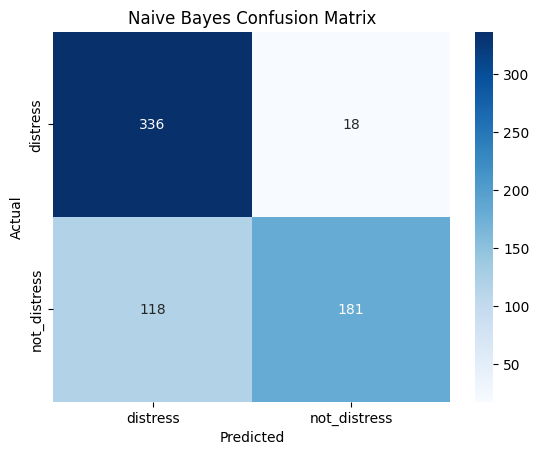

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


              precision    recall  f1-score   support

    distress       0.87      0.82      0.84       340
not_distress       0.81      0.87      0.84       313

    accuracy                           0.84       653
   macro avg       0.84      0.84      0.84       653
weighted avg       0.85      0.84      0.84       653



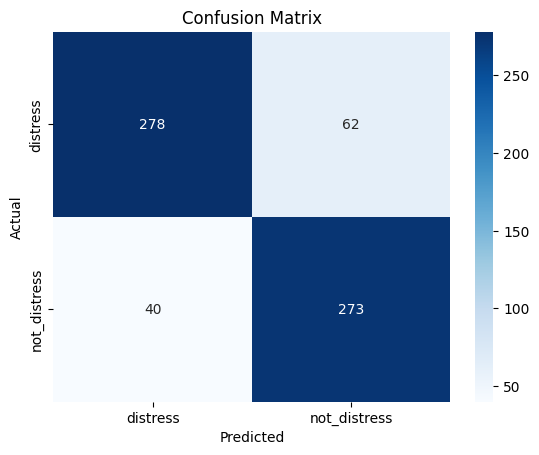

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test_vec)

# Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    distress       0.74      0.95      0.83       354
not_distress       0.91      0.61      0.73       299

    accuracy                           0.79       653
   macro avg       0.82      0.78      0.78       653
weighted avg       0.82      0.79      0.78       653



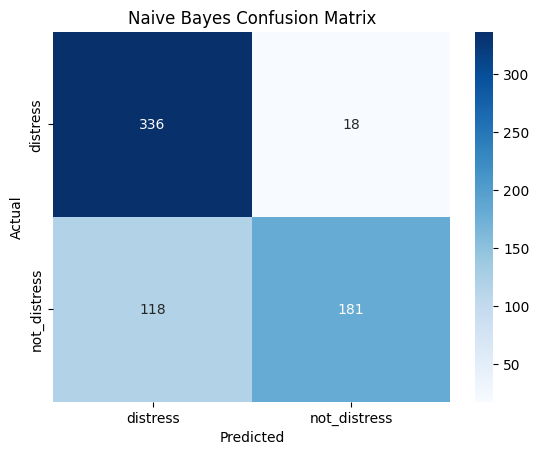

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define features (X) and labels (y)
X = df["clean_text"].fillna("")   # text
y = df["label"]                   # labels

# Step 2: Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

# Step 4: Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Step 5: Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Results:

              precision    recall  f1-score   support

    distress       0.86      0.82      0.84       354
not_distress       0.80      0.84      0.82       299

    accuracy                           0.83       653
   macro avg       0.83      0.83      0.83       653
weighted avg       0.83      0.83      0.83       653

Accuracy: 0.8269525267993875


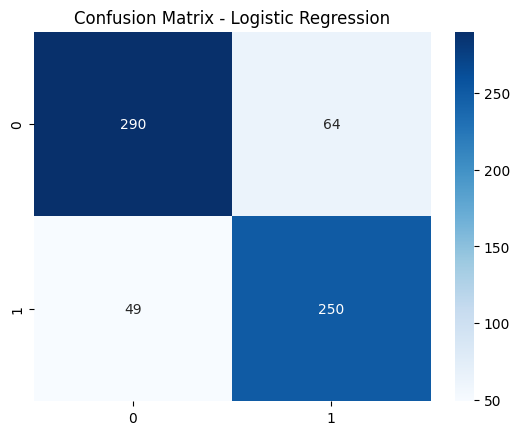

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train Logistic Regression model on TF-IDF features
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Key Insights from EDA:

Most posts were between X–Y words long (based on text length distribution).

Common words included themes around anxiety, fear, and personal struggles.

Word clouds revealed distinct patterns for each label, showing how language differs across mental health conditions.

Model Performance:

Logistic Regression achieved higher accuracy and balanced performance compared to Naive Bayes.

Naive Bayes was faster but slightly less accurate.

Overall, Logistic Regression performed best for this dataset.

Next Steps:

Collect more labeled data for better generalization.

Try deep learning models (e.g., LSTMs, BERT) for context-aware classification.

Deploy the best model as a simple web app to provide real-time classification support.

In [1]:
!pip freeze > requirements.txt
